In [1]:
import numpy as np
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

sns.set(style = 'dark')
%matplotlib inline
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

In [2]:
fifa_15 = pd.read_csv("players_15.csv")
fifa_16 = pd.read_csv("players_16.csv")
fifa_17 = pd.read_csv("players_17.csv")
fifa_18 = pd.read_csv("players_18.csv")
fifa_19 = pd.read_csv("players_19.csv")
fifa_20 = pd.read_csv("players_20.csv")

In [3]:
fifa_15.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,0,0,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,92,0,0,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3


In [4]:
fifa_16.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,94,95,111000000,550000,"RW, CF",Left,5,4,4,Medium/Low,Messi,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",RW,10.0,NaN,2004-07-01,2018.0,RW,10.0,92.0,88.0,86.0,95.0,24.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",80-4,93-1,71,88-1,85,96,89,90,79+3,96,95-1,90,92-2,92-2,95,80,68-5,76-1,59-1,88,48,22,90-2,90,74,NaN,13-12,23+2,21+1,6,11,15,14,8,87+3,87+3,87+3,91+3,91+3,91+3,91+3,91+3,91+3,91+3,91+3,90+3,82+3,82+3,82+3,90+3,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,93,93,85500000,475000,"LW, LM",Right,5,4,5,High/Low,C. Ronaldo,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LM,7.0,NaN,2009-07-01,2018.0,ST,7.0,92.0,93.0,80.0,91.0,33.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",82-1,95,86,81-1,87,93,88,77-2,72,91-1,91,93-1,90-3,92+2,62-1,94,94,87-2,79,93,62-1,29+5,93+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,90+3,91+3,91+3,91+3,90+3,88+3,88+3,88+3,88+3,80+3,80+3,80+3,88+3,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3
2,9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,56000000,250000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RW,11.0,92.0,86.0,82.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,51-1,85-1,86,93,86+1,83,74-2,90-2,92-1,92-1,91-2,91,91,86,61,76-2,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,84+3,84+3,84+3,89+3,88+3,88+3,88+3,89+3,88+3,88+3,88+3,87+3,80+3,80+3,80+3,87+3,65+3,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3


In [5]:
fifa_17.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,94,94,87000000,340000,"LW, LM, ST",Right,5,4,5,High/Low,C. Ronaldo,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LS,7.0,92.0,92.0,81.0,91.0,33.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",84+2,93-2,87+1,82+1,88+1,93,81-7,77,72,92+1,91,92-1,90,96+4,63+1,94,95+1,92+2,80+1,92-1,63+1,29,94+1,85+4,85,86,22,31,23,7,11,15,14,11,92+3,92+3,92+3,91+3,92+3,92+3,92+3,91+3,90+3,90+3,90+3,90+3,82+3,82+3,82+3,90+3,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,93,93,89000000,340000,RW,Left,5,4,4,Medium/Medium,Messi,Yes,NaN,"#Dribbler, #FK Specialist, #Acrobat, #Clinical...",RW,10.0,NaN,2004-07-01,2018.0,RW,10.0,89.0,90.0,86.0,96.0,26.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77-3,95+2,71,88,85,97+1,89,90,87+8,95-1,92-3,87-3,90-2,95+3,95,83+3,68,74-1,59,88,48,22,93+3,90,74,94,13,28+5,26+5,6,11,15,14,8,89+3,89+3,89+3,92+3,93+3,93+3,93+3,92+3,93+3,93+3,93+3,91+3,84+3,84+3,84+3,91+3,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3


In [6]:
fifa_18.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,94,94,95500000,565000,"LW, ST",Right,5,4,5,High/Low,C. Ronaldo,Yes,195800000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2021.0,LS,7.0,90.0,93.0,82.0,90.0,33.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",85+1,94+1,88+3,83,88,91-1,81,76,77,93,89-2,91-1,89-1,96,63,94+2,95,92,80,92+2,63,29,95+1,85,85,95+9,22,31,23,7,11,15,14,11,92+3,92+3,92+3,91+3,92+3,92+3,92+3,91+3,90+3,90+3,90+3,90+3,83+3,83+3,83+3,90+3,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,93,93,105000000,565000,RW,Left,5,4,4,Medium/Medium,Messi,Yes,215300000.0,"#Dribbler, #FK Specialist, #Acrobat, #Clinical...",RW,10.0,NaN,2004-07-01,2018.0,RW,10.0,89.0,90.0,86.0,96.0,26.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73-1,59,88,48,22,93,90,74,96+2,13,28,26,6,11,15,14,8,89+3,89+3,89+3,92+3,93+3,93+3,93+3,92+3,93+3,93+3,93+3,91+3,84+3,84+3,84+3,91+3,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3


In [7]:
fifa_19.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2


In [8]:
fifa_20.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [9]:
fifa_15.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [10]:
fifa_15.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,mentality_composure
count,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.0,15465.0,15465.000000,15465.000000,15465.000000,0.0,15233.000000,15226.000000,1056.000000,13762.000000,13762.000000,13762.000000,13762.000000,13762.000000,13762.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,0.0
mean,189298.588425,24.763272,181.093631,75.482703,63.948594,68.483091,0.0,0.0,1.126350,2.932363,2.267055,NaN,19.803584,2016.959740,12.026515,68.088432,51.671777,55.744223,60.617861,50.000799,64.602456,64.709336,60.823840,59.455079,65.955373,43.900763,61.230182,NaN
std,39648.820272,4.624565,6.635182,6.907243,7.208610,6.611708,0.0,0.0,0.401362,0.652270,0.719035,NaN,16.547682,2.069059,6.661003,11.004400,13.443599,10.765868,10.800142,15.850317,9.698882,7.855747,8.510626,8.689929,8.374343,8.440858,9.188257,NaN
min,2.000000,16.000000,155.000000,50.000000,40.000000,40.000000,0.0,0.0,1.000000,1.000000,1.000000,NaN,1.000000,2014.000000,1.000000,22.000000,22.000000,24.000000,25.000000,21.000000,28.000000,35.000000,36.000000,21.000000,31.000000,20.000000,38.000000,NaN
25%,178043.000000,21.000000,176.000000,70.000000,59.000000,64.000000,0.0,0.0,1.000000,3.000000,2.000000,NaN,8.000000,2015.000000,6.000000,62.000000,41.000000,49.000000,54.000000,33.000000,58.000000,59.000000,55.000000,53.000000,60.000000,39.000000,54.000000,NaN
50%,200844.000000,24.000000,181.000000,75.000000,64.000000,68.000000,0.0,0.0,1.000000,3.000000,2.000000,NaN,17.000000,2016.000000,12.000000,69.000000,53.000000,57.000000,62.000000,53.000000,66.000000,64.000000,61.000000,59.000000,65.000000,44.000000,61.000000,NaN
75%,214326.000000,28.000000,186.000000,80.000000,69.000000,73.000000,0.0,0.0,1.000000,3.000000,3.000000,NaN,26.000000,2019.000000,18.000000,76.000000,62.000000,63.000000,68.000000,63.000000,72.000000,70.000000,67.000000,65.000000,72.000000,49.000000,68.000000,NaN
max,225562.000000,44.000000,203.000000,110.000000,93.000000,95.000000,0.0,0.0,5.000000,5.000000,5.000000,NaN,99.000000,2021.000000,28.000000,97.000000,93.000000,91.000000,96.000000,90.000000,91.000000,88.000000,87.000000,92.000000,90.000000,66.000000,90.000000,NaN


In [11]:
#Radar plot:
Messi = {'Pace':89,'Shooting':90,'Passing':86,'Dribbling':95,'Defending':26,'Physical':61}
Ronaldo = {'Pace':90,'Shooting':93,'Passing':82,'Dribbling':90,'Defending':33,'Physical':80}

In [12]:
radar_15 = fifa_15[["short_name", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]
radar_15 = radar_15.set_index(["short_name"])
radar_15 = radar_15.dropna()
radar_15.head(2)

,pace,shooting,passing,dribbling,defending,physic
short_name,,,,,,
L. Messi,93.0,89.0,86.0,96.0,27.0,63.0
Cristiano Ronaldo,93.0,93.0,81.0,91.0,32.0,79.0


In [13]:
radar_15.describe()

,pace,shooting,passing,dribbling,defending,physic
count,13762.000000,13762.000000,13762.000000,13762.000000,13762.000000,13762.000000
mean,68.088432,51.671777,55.744223,60.617861,50.000799,64.602456
std,11.004400,13.443599,10.765868,10.800142,15.850317,9.698882
min,22.000000,22.000000,24.000000,25.000000,21.000000,28.000000
25%,62.000000,41.000000,49.000000,54.000000,33.000000,58.000000
50%,69.000000,53.000000,57.000000,62.000000,53.000000,66.000000
75%,76.000000,62.000000,63.000000,68.000000,63.000000,72.000000
max,97.000000,93.000000,91.000000,96.000000,90.000000,91.000000


In [14]:
# make a list out of the columns' names and call it Attributes
Attributes =list(radar_15)
AttNo = len(Attributes)

In [15]:
# Rondaldo's values
values = radar_15.iloc[1].tolist()
values += values [:1]
values

[93.0, 93.0, 81.0, 91.0, 32.0, 79.0, 93.0]

In [16]:
# Radar plot angles:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

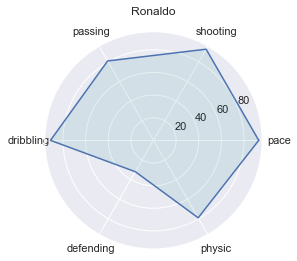

In [17]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title("Ronaldo")
plt.show()

In [18]:
#Find the values and angles for Messi
values2 = radar_15.iloc[0].tolist()
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

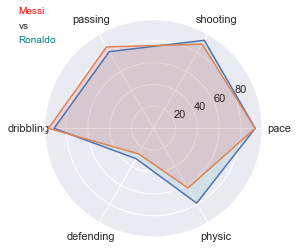

In [19]:
#Create the chart as before, but with both Ronaldo's and Messi's angles/values
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1],Attributes)

ax.plot(angles,values)
ax.fill(angles, values, 'teal', alpha=0.1)

ax.plot(angles2,values2)
ax.fill(angles2, values2, 'red', alpha=0.1)

#Rather than use a title, individual text points are added
plt.figtext(0.2,0.9,"Messi",color="red")
plt.figtext(0.2,0.85,"vs")
plt.figtext(0.2,0.8,"Ronaldo",color="teal")
plt.show()

In [20]:
# Creating a function to plot individual players
def createRadar(df, player):
    Attributes =list(radar_15)
    AttNo = len(Attributes)
    
    data = df.loc[player, :].tolist()
    data += data [:1]
    
    angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)
    ax.plot(angles,data)
    ax.fill(angles, data, 'blue', alpha=0.1)

    ax.set_title(player)
    plt.show()

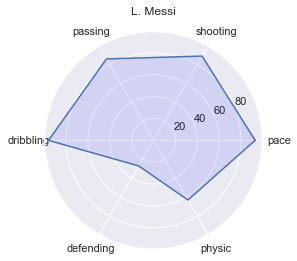

In [21]:
#Example:
createRadar(radar_15, "L. Messi")

In [22]:
# Function to compare two players
def createRadar2(df1, player1, df2, player2):
    Attributes =list(radar_15)
    AttNo = len(Attributes)
    
    data = df1.loc[player1, :].tolist()
    data += data [:1]
    
    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles += angles [:1]
    
    data2 = df2.loc[player2, :].tolist()
    data2 += data2 [:1]
    
    angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    #Create the chart as before, but with both Ronaldo's and Messi's angles/values
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,data)
    ax.fill(angles, data, 'teal', alpha=0.1)

    ax.plot(angles2,data2)
    ax.fill(angles2, data2, 'red', alpha=0.1)

    #Rather than use a title, individual text points are added
    plt.figtext(0.2,0.9,player1,color="teal")
    plt.figtext(0.2,0.85,"vs")
    plt.figtext(0.2,0.8,player2,color="red")
    plt.show()

C:\Users\Seno\Miniconda3\envs\code_red\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


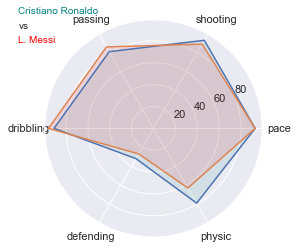

In [23]:
#example:
createRadar2(radar_15, "Cristiano Ronaldo", radar_15,"L. Messi");

In [24]:
scatter_16 = fifa_16[["value_eur", "overall", "team_position"]]
scatter_16["value (M)"] = scatter_16["value_eur"]/1000000
scatter_16

C:\Users\Seno\Miniconda3\envs\code_red\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,value_eur,overall,team_position,value (M)
0,111000000,94,RW,111.00
1,85500000,93,LM,85.50
2,56000000,90,SUB,56.00
3,58000000,90,GK,58.00
4,69000000,90,ST,69.00
...,...,...,...,...
14876,60000,44,RES,0.06
14877,50000,44,SUB,0.05
14878,40000,44,RES,0.04
14879,30000,44,RES,0.03


In [25]:
X = scatter_16['overall'].values.reshape(-1,1)
y = scatter_16['value (M)'].values.reshape(-1,1)
regr = linear_model.LinearRegression().fit(X, y)

y_pred = regr.predict(X)
print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))

Coefficients:  [[0.35169048]]
Mean squared error: 11.18
Variance score: 0.36


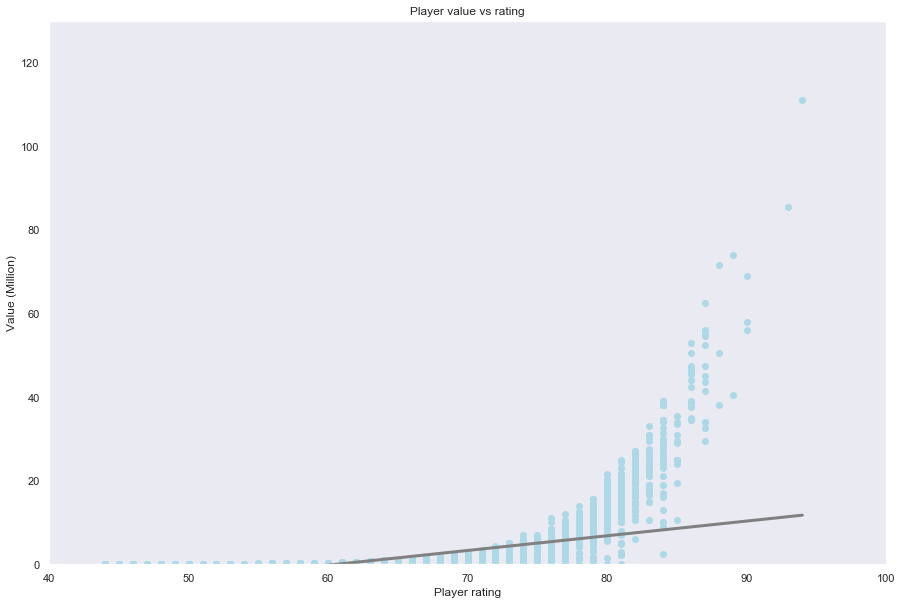

In [26]:
def plot_chart(X, y, y_pred, x_l, x_h, y_l, y_h, c):
    plt.figure(figsize = (15,10))
    plt.scatter(X, y, c =c)
    plt.plot(X, y_pred, c ='gray', linewidth=3)

    plt.title('Player value vs rating')
    plt.ylim(y_l,y_h)
    plt.xlim(x_l,x_h)
    plt.ylabel('Value (Million)')
    plt.xlabel('Player rating')
    
plot_chart(X, y, y_pred, 40, 100, 0, 130, 'lightblue')

A few observations:

    Linear regression is not a good fit to the data (let's try polynomial models)
    There are a lot of players with zero value that skewed the dataset (let's exclude those from our analysis)

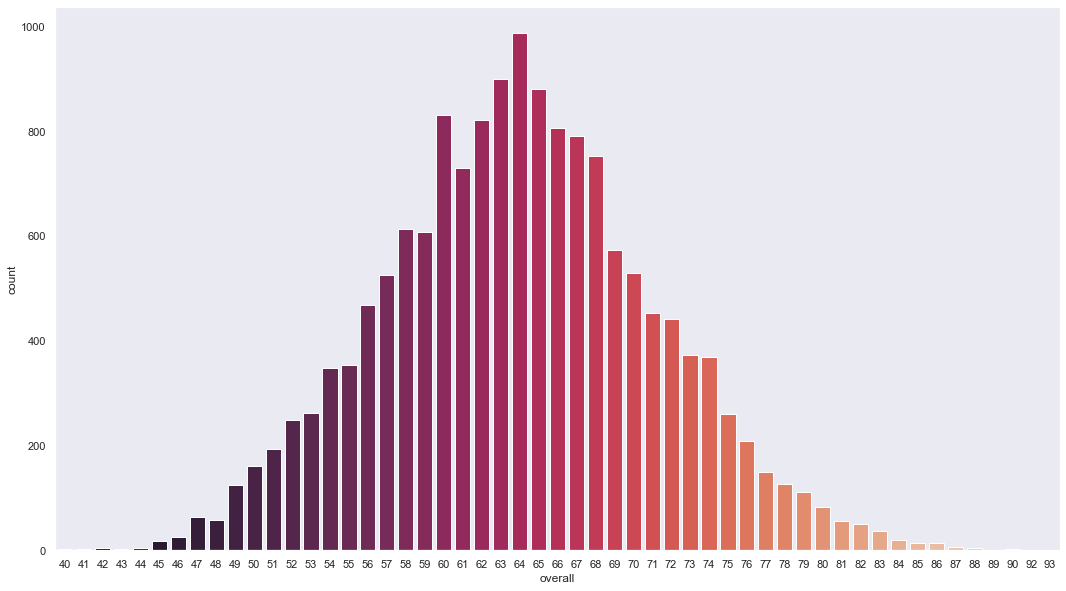

In [27]:
#The Overall Rating
plt.figure(figsize=(18,10))
sns.countplot(fifa_15['overall'], palette='rocket')
plt.show()

In [28]:
fifa_16.sort_values(by = 'skill_fk_accuracy' , ascending = False)[['short_name','club','nationality','overall', 'age','skill_fk_accuracy']].head(5)

,short_name,club,nationality,overall,age,skill_fk_accuracy
420,H. Çalhanoğlu,Bayer 04 Leverkusen,Turkey,79,21,95+1
67,A. Pirlo,New York City FC,Italy,84,36,93
465,Z. Junuzović,SV Werder Bremen,Austria,79,27,92+1
1164,J. Arango,Club Tijuana,Venezuela,76,35,91+1
0,L. Messi,FC Barcelona,Argentina,94,28,90


In [29]:
#Age Distribution
clubs = ['Chelsea' , 'Arsenal', 'Liverpool', 'Manchester City', 'Manchester United', 
         'Juventus', 'Roma', 'Napoli', 'Inter', 'Milan', 
         'Paris Sain-Germain' ,
         'FC Bayern München', 'Borussia Dortmund', 
         'Real Madrid' , 'FC Barcelona' , 'Atlético Madrid']

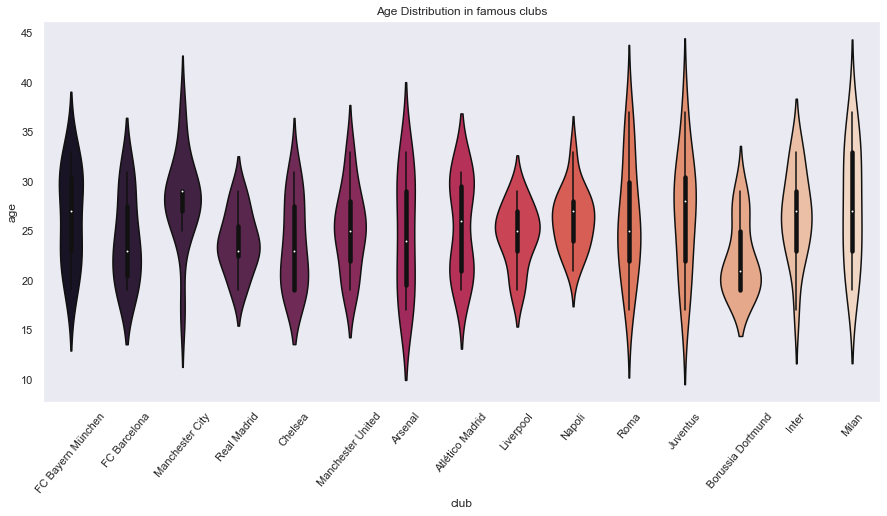

In [30]:
fifa_club_age = fifa_16.loc[fifa_16['club'].isin(clubs) & fifa_16['age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'club' , y = 'age' , data = fifa_club_age,palette='rocket')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

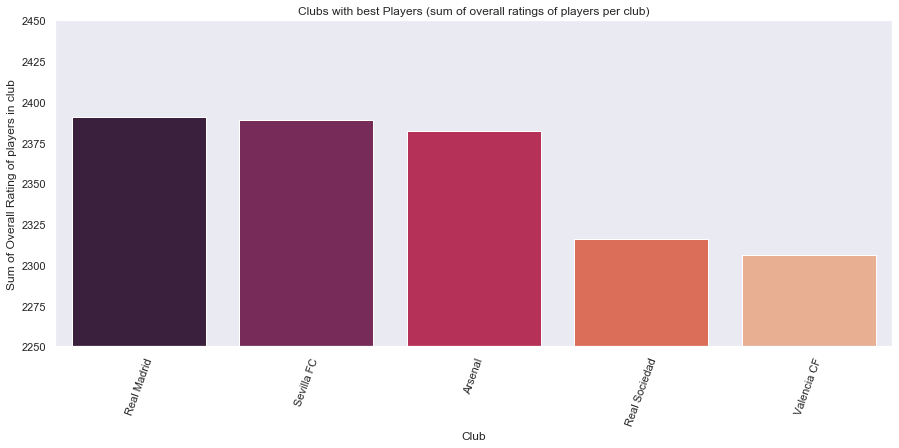

In [31]:
#The Best Club
best_dict = {}
for club in fifa_16['club'].unique():
    overall_rating = fifa_16['overall'][fifa_16['club'] == club].sum()
    best_dict[club] = overall_rating
best_club = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['overall'])
best_club['club'] = best_club.index
best_club = best_club.sort_values(by = 'overall' , ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x = 'club' , y  = 'overall' , data = best_club.head(5),palette='rocket')  
plt.xticks(rotation = 70)
plt.xlabel("Club")
plt.ylabel('Sum of Overall Rating of players in club')
plt.title('Clubs with best Players (sum of overall ratings of players per club)')
plt.ylim(2250 , 2450)
plt.show()



In [32]:
countries = ['England' , 'Brazil' , 'Portugal' ,'Argentina',
             'Italy' , 'Spain' , 'Germany' ,'Netherlands','France']

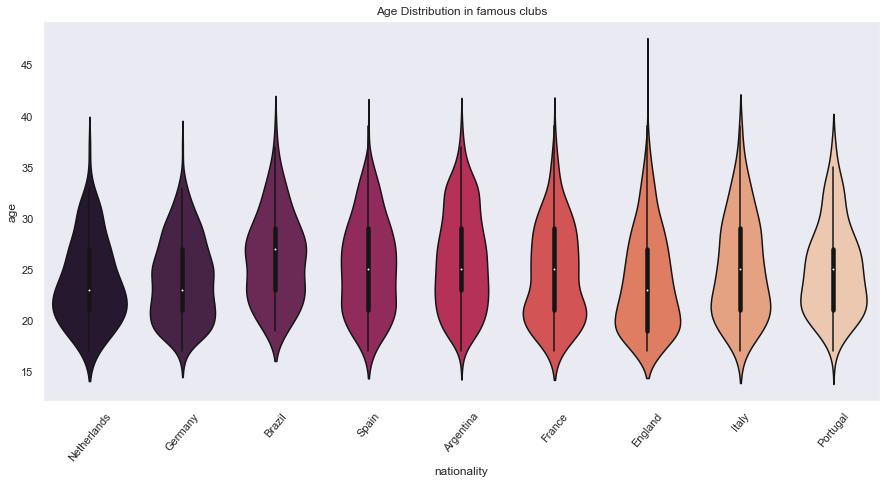

In [33]:
#Age Distribution
fifa_country_age = fifa_16.loc[fifa_16['nationality'].isin(countries) & fifa_16['age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'nationality' , y = 'age' , data = fifa_country_age, palette='rocket')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()


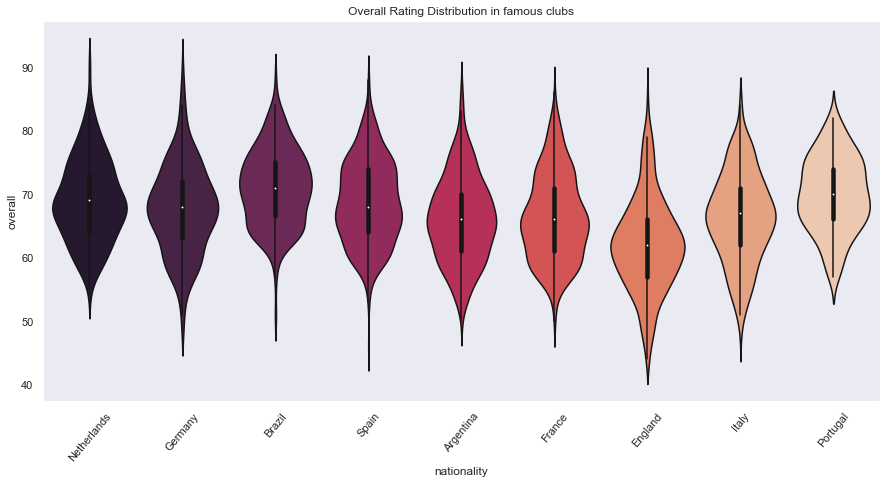

In [34]:
#Overall Rating
fifa_country_rating = fifa_16.loc[fifa_16['nationality'].isin(countries) & fifa_16['overall']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'nationality' , y = 'overall' , data = fifa_country_age, palette='rocket')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()


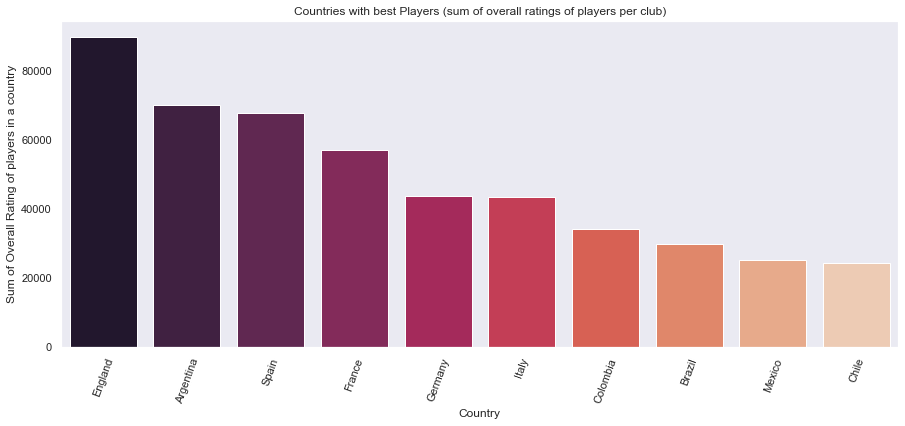

In [35]:
#The Best Country
best_dict = {}
for country in fifa_16['nationality'].unique():
    overall_rating = fifa_16['overall'][fifa_16['nationality'] == country].sum()
    best_dict[country] = overall_rating
best_country = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['overall'])
best_country['club'] = best_country.index
best_country = best_country.sort_values(by = 'overall' , ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x = 'club' , y  = 'overall' , data = best_country.head(10),palette='rocket')  
plt.xticks(rotation = 70)
plt.xlabel("Country")
plt.ylabel('Sum of Overall Rating of players in a country')
plt.title('Countries with best Players (sum of overall ratings of players per club)')
plt.show()


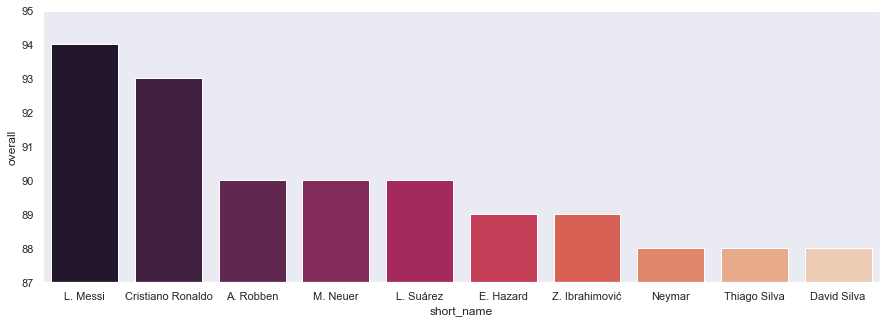

In [36]:
#The Top 10 Players
fifa_best_players = pd.DataFrame.copy(fifa_16.sort_values(by = 'overall' , ascending = False ).head(10))

plt.figure(1 , figsize = (15 , 5))
sns.barplot(x ='short_name' , y = 'overall' , data = fifa_best_players,palette='rocket')

plt.ylim(87 , 95)
plt.show()


In [37]:
fifa_16.sort_values(by = 'wage_eur' , ascending = False)[['short_name','club','nationality','overall',
'age','wage_eur']].head()

,short_name,club,nationality,overall,age,wage_eur
0,L. Messi,FC Barcelona,Argentina,94,28,550000
1,Cristiano Ronaldo,Real Madrid,Portugal,93,30,475000
4,L. Suárez,FC Barcelona,Uruguay,90,28,300000
2,A. Robben,FC Bayern München,Netherlands,90,31,250000
3,M. Neuer,FC Bayern München,Germany,90,29,250000


In [38]:
#Correlations among different variables
numcols = ['overall', 'potential', 'pace', 'shooting', 'passing',  'dribbling',  'defending','physic', 'movement_sprint_speed', 
           'movement_acceleration', 'power_shot_power','wage_eur']
catcols = ['short_name','club','nationality','preferred_foot','player_positions','body_type']
player_df = fifa_16[numcols+ catcols]

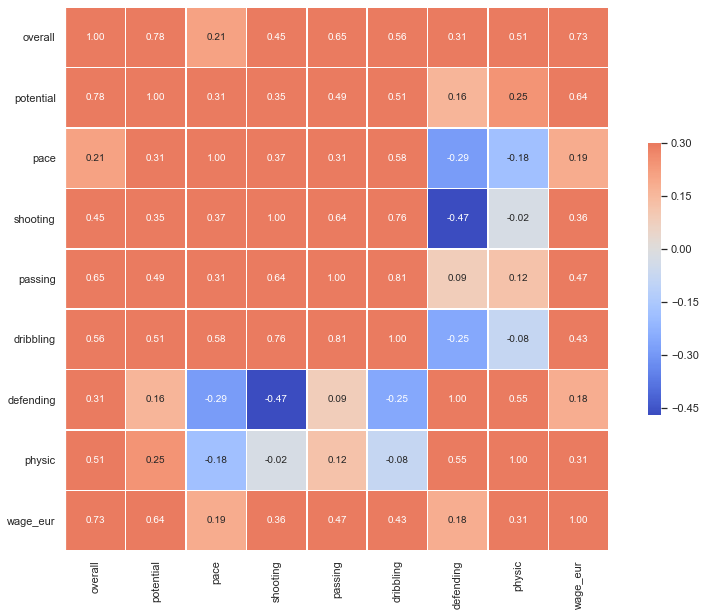

In [39]:
corr = player_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [40]:
#Choosing clubs and nationalities in order to perform the check
filtered_player_df = fifa_16[(fifa_16['club'].isin(['Chelsea' , 'Arsenal', 'Liverpool', 'Manchester City', 
                                                    'Manchester United', 
                                                    'Juventus', 'Roma', 'Napoli', 'Inter', 'Milan',
                                                    'Paris Sain-Germain' 
                                                    'FC Bayern München', 'Borussia Dortmund',
                                                    'Real Madrid' , 'FC Barcelona' , 'Atlético Madrid'])) &
                             (player_df['nationality'].isin(['England' , 'Brazil' , 'Portugal' ,'Argentina', 
                                                             'Italy' , 'Spain' , 'Germany' ,'Netherlands','France']))]

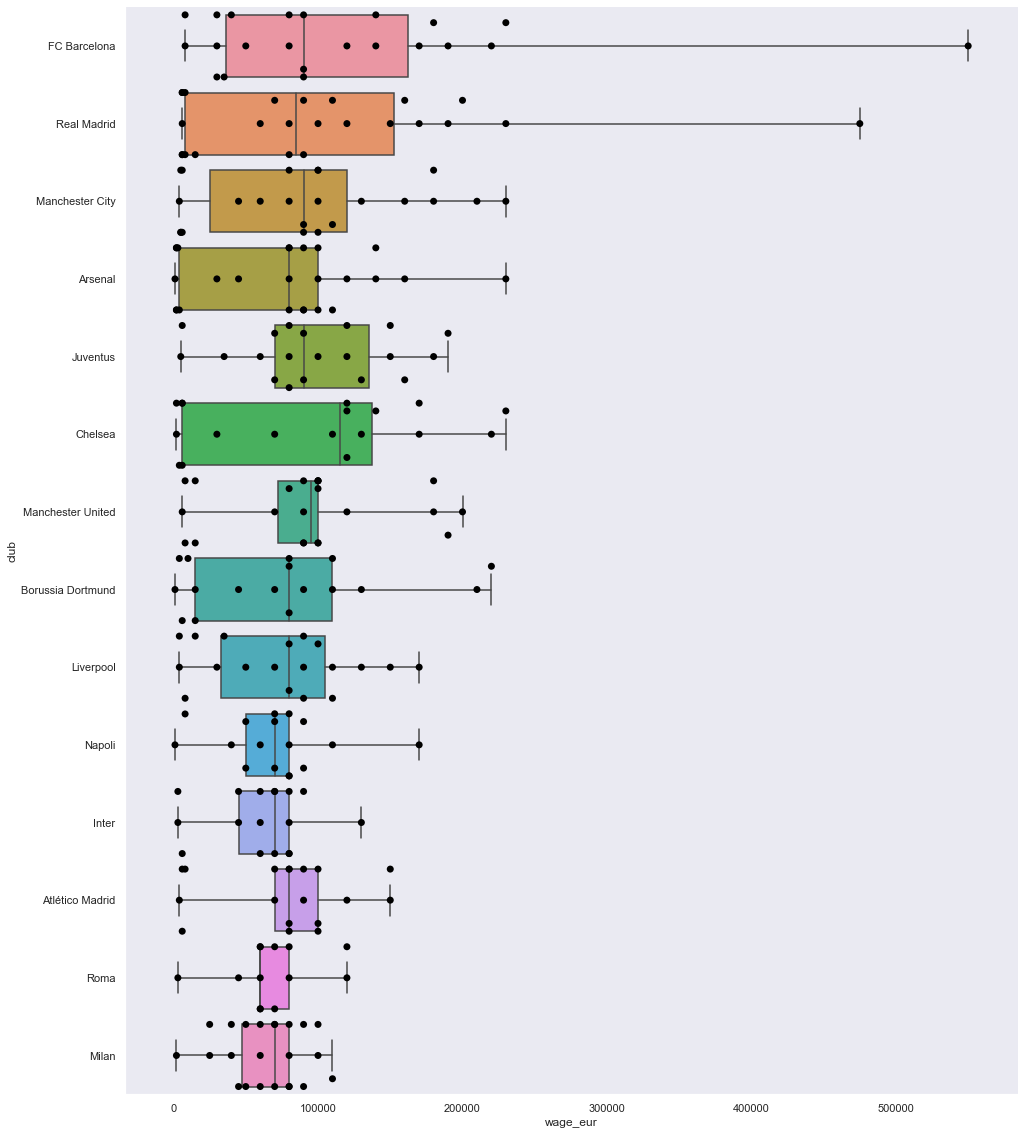

In [41]:
#nationalites in the important clubs
g = sns.boxplot(y = "club",
              x = 'wage_eur', 
              data = filtered_player_df, whis=np.inf)
g = sns.swarmplot(y = "club",
              x = 'wage_eur', 
              data = filtered_player_df,
              # Decrease the size of the points to avoid crowding 
              size = 7,color = 'black')
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(16,20)
plt.show()